## Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [2]:
data= pd.read_csv("AQI_India.csv")

data

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Katihar,"Mirchaibari, Katihar - BSPCB",04-11-2025 11:00:00,25.560083,87.553265,PM2.5,27.0,100.0,62.0
1,India,Bihar,Katihar,"Mirchaibari, Katihar - BSPCB",04-11-2025 11:00:00,25.560083,87.553265,PM10,25.0,94.0,58.0
2,India,Bihar,Manguraha,"Forest Rest House, Manguraha - BSPCB",04-11-2025 11:00:00,27.308328,84.531742,PM10,103.0,193.0,124.0
3,India,Bihar,Manguraha,"Forest Rest House, Manguraha - BSPCB",04-11-2025 11:00:00,27.308328,84.531742,SO2,16.0,18.0,17.0
4,India,Bihar,Motihari,"Gandak Colony, Motihari - BSPCB",04-11-2025 11:00:00,26.630860,84.900510,PM2.5,20.0,24.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
3352,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",04-11-2025 11:00:00,22.627847,88.380669,CO,28.0,44.0,36.0
3353,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",04-11-2025 11:00:00,22.544808,88.340369,PM10,83.0,185.0,138.0
3354,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",04-11-2025 11:00:00,22.544808,88.340369,SO2,2.0,12.0,6.0
3355,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",04-11-2025 11:00:00,26.687923,88.415250,PM2.5,34.0,57.0,42.0


In [3]:
data.shape

(3357, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3357 non-null   object 
 1   state          3357 non-null   object 
 2   city           3357 non-null   object 
 3   station        3357 non-null   object 
 4   last_update    3357 non-null   object 
 5   latitude       3357 non-null   float64
 6   longitude      3357 non-null   float64
 7   pollutant_id   3357 non-null   object 
 8   pollutant_min  3179 non-null   float64
 9   pollutant_max  3179 non-null   float64
 10  pollutant_avg  3179 non-null   float64
dtypes: float64(5), object(6)
memory usage: 288.6+ KB


In [5]:
data.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    178
pollutant_max    178
pollutant_avg    178
dtype: int64

In [7]:
data.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,22.753183,78.490356,27.713117,80.952815,47.731991
std,5.550923,4.671140,42.883557,100.729115,66.496799
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.065931,75.638133,5.000000,16.000000,10.000000
50%,23.508764,77.315741,14.000000,44.000000,24.000000
75%,27.272719,80.260625,31.000000,102.500000,55.000000
max,31.620000,94.636574,500.000000,500.000000,500.000000


## Data Cleaning

In [6]:
data.dropna(inplace=True)

In [8]:
data=data[data['pollutant_min']<400]

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data['last_update']=pd.to_datetime(data['last_update'])


C:\Users\MUIN\AppData\Local\Temp\ipykernel_6512\1094591435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_update']=pd.to_datetime(data['last_update'])


In [11]:
state=data['state'].value_counts().head(15)


In [12]:
state.index

Index(['Maharashtra', 'Uttar_Pradesh', 'Rajasthan', 'Delhi', 'Bihar',
       'Karnataka', 'Haryana', 'TamilNadu', 'Madhya Pradesh', 'West_Bengal',
       'Odisha', 'Gujarat', 'Chhattisgarh', 'Telangana', 'Andhra_Pradesh'],
      dtype='object', name='state')

In [13]:
data['pollutant_id'].value_counts()

pollutant_id
NO2      470
OZONE    467
CO       464
PM10     460
PM2.5    457
SO2      450
NH3      410
Name: count, dtype: int64

## Data Visualization 

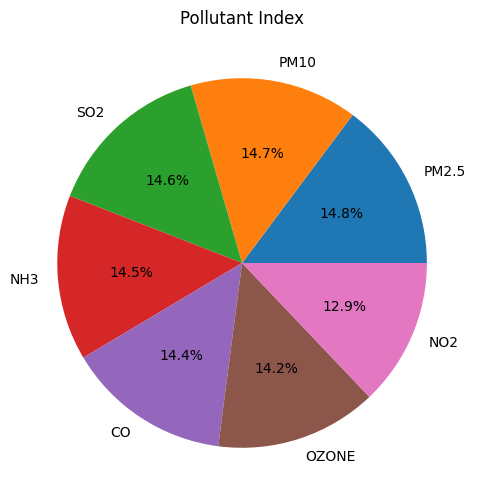

In [14]:
plt.figure(figsize=(10,6))
plt.pie(data['pollutant_id'].value_counts(),labels=data['pollutant_id'].unique(),autopct="%1.1f%%")
plt.title("Pollutant Index")
plt.show()

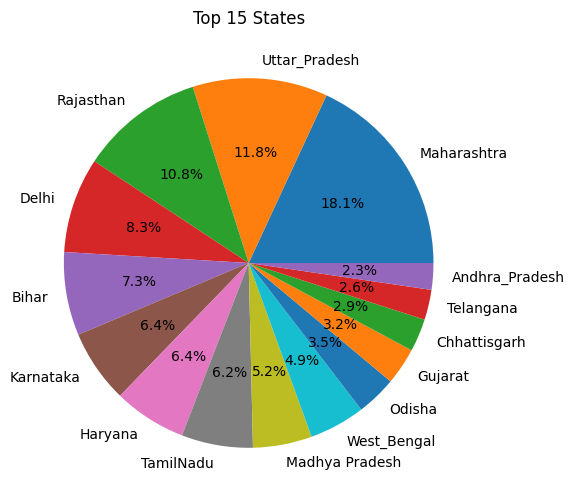

In [15]:
plt.figure(figsize=(10,6))
plt.pie(state,labels=state.index,autopct="%1.1f%%")
plt.title("Top 15 States")
plt.show()

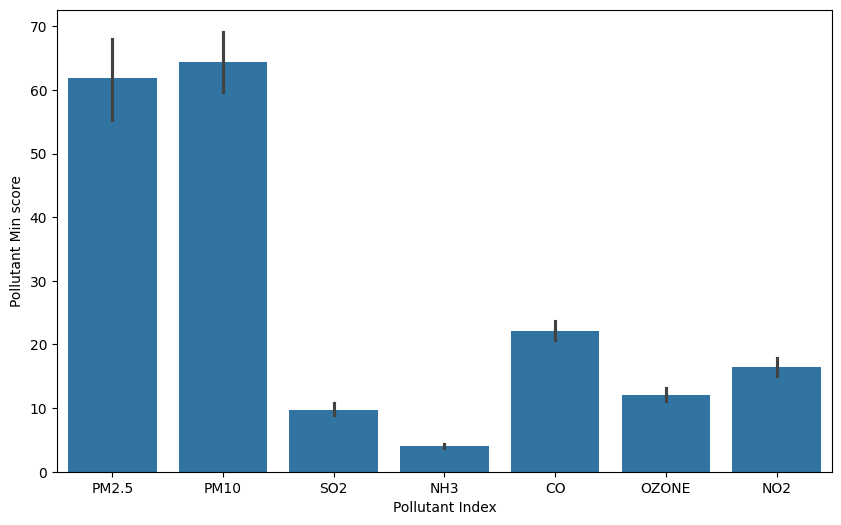

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['pollutant_id'],y=data['pollutant_min'])
plt.xlabel('Pollutant Index')
plt.ylabel('Pollutant Min score')
plt.show()

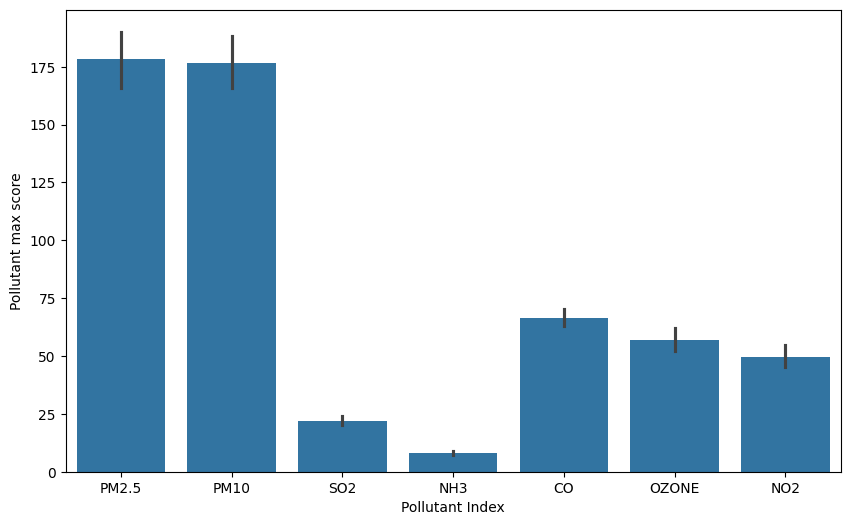

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['pollutant_id'],y=data['pollutant_max'])
plt.xlabel('Pollutant Index')
plt.ylabel('Pollutant max score')
plt.show()

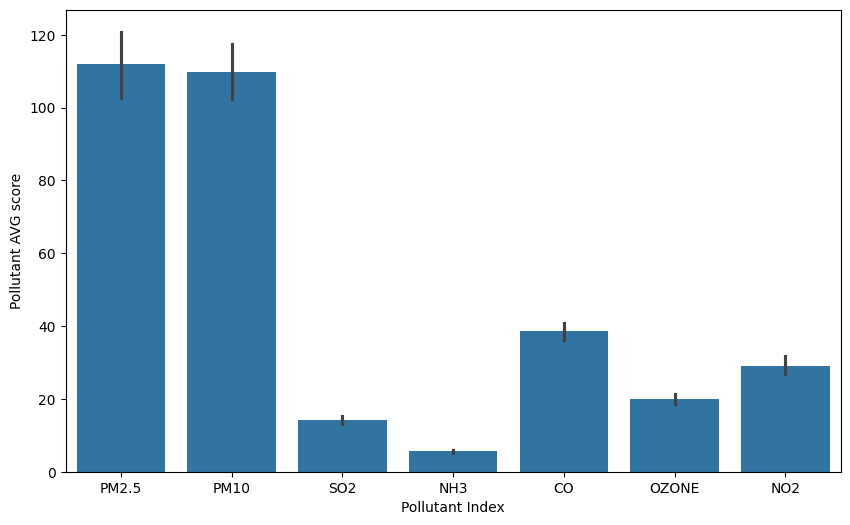

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['pollutant_id'],y=data['pollutant_avg'])
plt.xlabel('Pollutant Index')
plt.ylabel('Pollutant AVG score')
plt.show()

In [19]:
by_state =data.groupby('state')[['pollutant_min','pollutant_max','pollutant_avg']].sum()
by_state

,pollutant_min,pollutant_max,pollutant_avg
state,,,
Andhra_Pradesh,1426.0,3755.0,2190.0
Arunachal_Pradesh,27.0,204.0,54.0
Assam,699.0,1849.0,1096.0
Bihar,7125.0,15657.0,10311.0
Chandigarh,420.0,2369.0,1197.0
Chhattisgarh,1240.0,4116.0,2125.0
Delhi,17062.0,46436.0,29799.0
Gujarat,1393.0,4425.0,2549.0
Haryana,7492.0,18885.0,12522.0


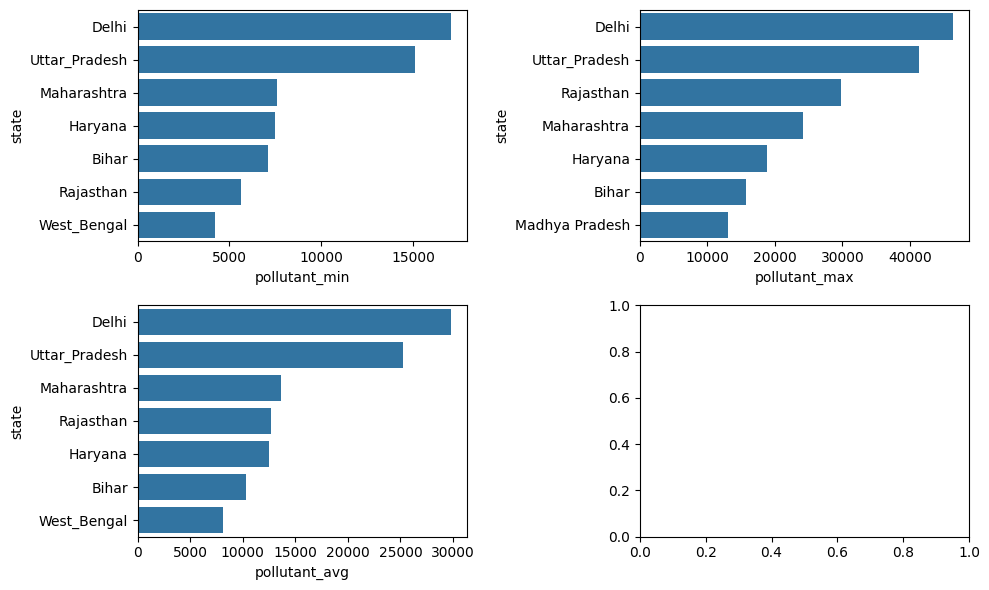

In [49]:
fig,axes = plt.subplots(2,2,figsize=(10,6))

for ax , i in zip(axes.flat,by_state.columns):
    top_df = by_state[i].nlargest(7).reset_index()
    sns.barplot(data=top_df,x=i,y='state',ax=ax)

plt.tight_layout()
plt.show()